<a href="https://colab.research.google.com/github/sandhigupta/Sandhi/blob/main/replay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pd

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
def replay(data):
  features = [list(i) for i in data[0]]
  labels = list(data[1])
  new_features = []
  new_labels = []

  for i in features:
    if np.random.random() < 0.2:
      repeats = np.random.randint(10, 20)
      for j in range(repeats):
        new_features.append(i)
        new_labels.append(1)
    else:
      new_features.append(i)
      new_labels.append(0)
  return (np.array(new_features), np.array(new_labels))

In [ ]:
df = pd.read_csv(r'LoadMinPower.csv')
df.drop(df.columns[[0,1]], axis=1, inplace=True)
replayed = replay((df.to_numpy(), [0 for i in range(len(df))]))
features, labels = replayed[0], replayed[1]


In [ ]:
y = np.array([i[0] for i in features][:200])
y2 = np.array([i[4] for i in features][:200])
y3 = np.array([i[10] for i in features][:200])

print(f" Sensor 1 Mean: {y.mean()}, Variance: {y.var()}")
print(f" Sensor 5 Mean: {y2.mean()}, Variance: {y2.var()}")
print(f" Sensor 11 Mean: {y3.mean()}, Variance: {y3.var()}")

 Sensor 1 Mean: 2.3886033597600003, Variance: 4.179602763105112
 Sensor 5 Mean: 1.418477390245, Variance: 1.1200997592702933
 Sensor 11 Mean: 0.86473238412, Variance: 0.2953045011438434


In [ ]:
x = np.arange(0, len(y))


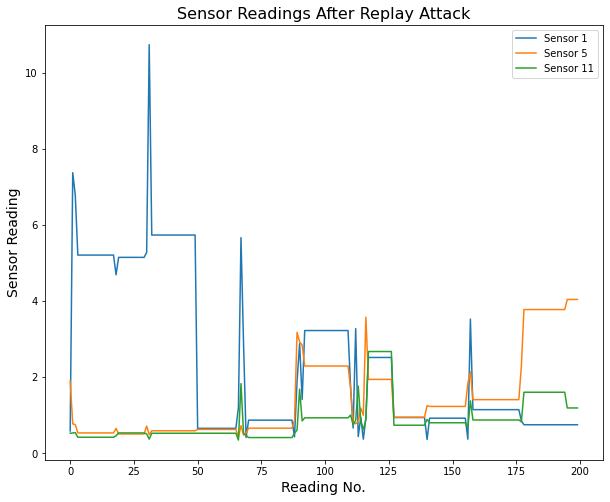

In [ ]:
plt.figure(figsize=(10,8))
plt.xlabel('Reading No.',fontsize=14)
plt.ylabel('Sensor Reading',fontsize=14)
plt.title('Sensor Readings After Replay Attack',fontsize=16)
plt.plot(x,y,label='Sensor 1')
plt.plot(y2, label = 'Sensor 5')
plt.plot(y3, label = 'Sensor 11')
plt.legend(loc='upper right')
plt.savefig('LoadMinSensorsafterReplayAttack')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=1, shuffle=True)

In [ ]:
knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)

print(f"Accuracy of KNN: {round(accuracy_score(y_test, knn_predictions)*100)}%")

Accuracy of KNN: 87%


In [ ]:
df = pd.read_csv(r'LoadMaxPower.csv')
df.drop(df.columns[[0,1]], axis=1, inplace=True)
replayed = replay((df.to_numpy(), [0 for i in range(len(df))]))
max_features, max_labels = replayed[0], replayed[1]

In [ ]:
knn_pred = knn_model.predict(max_features)
print(f" KNN: {accuracy_score(max_labels, knn_pred)}")

tn, fp, fn, tp = confusion_matrix(max_labels, knn_pred).ravel()
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")


 KNN: 0.5409357609484636
TN: 5966, FP: 7967, FN: 22390, TP: 29805


In [ ]:
confusion_matrix(y_test, knn_predictions)

In [ ]:
matrix = plot_confusion_matrix(svm, X_test, y_test)
matrix.ax_.set_title('Confusion Matrix', color='black')
plt.xlabel('Predicted label', color='black')
plt.ylabel('True label',color='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()